# Gamma (preference parameter)

To examine the effect of experimental factors on the "Gamma (preference parameter)"


## Requirements


In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(ggpubr)
    library(rstatix)
    library(dplyr)
    library(lme4)
    library(AICcmodavg)
    library(MuMIn)
    library(emmeans)
    library(patchwork)
}))

options(warn = -1) # turn-off warnings

## Data preparation

In [1]:
library(readxl)
setwd("C:/DataForR")
getwd()
data = read_excel("ProcessedData.xlsx", sheet = "ModelParams")
data

[1] "C:/DataForR"

subject No.,Axis Orientation,orientation No.,gamma: preference parameter,g: mutual inhibition parameter,average hysteresis [SN],scaled alpha1 (descending),scaled alpha2 (ascending)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal,0,1.5960115,1.0204008,0.5000,0.5937500,0.6354167
1,Oblique,1,0.8823529,1.0000000,0.0000,0.4687500,0.4687500
2,Orthogonal,0,3.0023179,1.0281911,0.2500,0.7395833,0.7604167
2,Oblique,1,0.7614447,1.0028783,-0.1250,0.4375000,0.4270833
3,Orthogonal,0,1.4000000,1.0000000,0.0000,0.5833333,0.5833333
3,Oblique,1,1.2343952,1.0178347,1.0000,0.5104167,0.5937500
4,Orthogonal,0,3.7416574,1.2864959,2.5000,0.6666667,0.8750000
4,Oblique,1,1.4969356,1.0306770,0.8750,0.5625000,0.6354167
5,Orthogonal,0,1.5829979,1.1370830,3.2500,0.4687500,0.7395833


In [3]:
# create a dataframe based on the required columns of data:
subject = data[,"subject No."]
AxisOrientation = data[,"Axis Orientation"]
orientation = data[,"orientation No."]
Gamma = data[,"gamma: preference parameter"]

mydata = data.frame(subject,AxisOrientation,orientation,Gamma)
colnames(mydata) = c("subject","AxisOrientation","orientation","Gamma")

# Convert into factor variables
mydata = mydata %>%
  convert_as_factor(subject,AxisOrientation)

# set the levels:
mydata$AxisOrientation = factor(mydata$AxisOrientation, levels = c("Orthogonal", "Oblique"))

mydata

subject,AxisOrientation,orientation,Gamma
<fct>,<fct>,<dbl>,<dbl>
1,Orthogonal,0,1.5960115
1,Oblique,1,0.8823529
2,Orthogonal,0,3.0023179
2,Oblique,1,0.7614447
3,Orthogonal,0,1.4000000
3,Oblique,1,1.2343952
4,Orthogonal,0,3.7416574
4,Oblique,1,1.4969356
5,Orthogonal,0,1.5829979


## summary statistics


In [4]:
mydata %>%
  group_by(AxisOrientation,orientation) %>%
  get_summary_stats(Gamma, type = "mean_sd")

AxisOrientation,orientation,variable,n,mean,sd
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,0,Gamma,34,1.986,0.864
Oblique,1,Gamma,34,1.056,0.266


## Visualization

In [5]:
# calculate mean, standard deviation and standard error:
mydata.summary = mydata %>%
  group_by(AxisOrientation) %>%
  summarise(
    mean = mean(Gamma),
    sd = sd(Gamma),
    se = sd(Gamma)/sqrt(34)
  )
mydata.summary

AxisOrientation,mean,sd,se
<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,1.986439,0.8635871,0.14810396
Oblique,1.055842,0.2659683,0.04561318


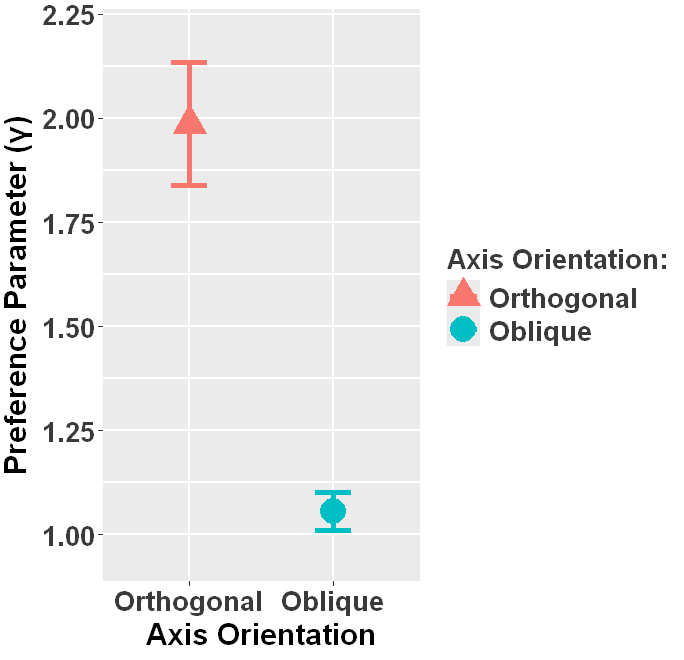

In [6]:
options(repr.plot.height=5.5, repr.plot.width=5.7)

ggplot(data = mydata.summary, aes(x = AxisOrientation, y = mean, group = 1)) +
    geom_errorbar(aes(ymin = mean-se, ymax = mean+se, shape=AxisOrientation, color=AxisOrientation), 
            width=0.25, size=1.5, alpha=1) +
    geom_point(size=7, aes(shape=AxisOrientation, color=AxisOrientation)) + 
#       geom_line(color = "darkgrey", size = 1.2, linetype = "solid") + 
    scale_shape_manual(values = c(17, 16, 15)) + 
    xlab("Axis Orientation") + ylab("Preference Parameter (\u03b3)") +
    labs(shape = "Axis Orientation: ", color = "Axis Orientation: ") + 
    coord_cartesian(ylim = c(0.95,2.20)) +
    scale_y_continuous(breaks=c(1,1.25,1.5,1.75,2,2.25)) +
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 18, face="bold", vjust=2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) 
    
# save plot:
ggsave("plot_Gamma_A.jpg", dpi = 300, height = 5.5, width = 5.7)

# Mixed Effects Model

## Model Selection

In [7]:
# define models:
lme.Null        = lmer(Gamma ~ (1 | subject), REML = FALSE, data = mydata)
lme.Orientation = lmer(Gamma ~ orientation + (1 | subject), REML = FALSE, data = mydata)

# run aictab:
modelsMS = list("null"        = lme.Null,
                "orientation" = lme.Orientation)

output = aictab(cand.set = modelsMS)

# add evidence ratio
output$EvidenceRatio = output$AICcWt[1]/output$AICcWt

# add marginal and conditional R-squared:
for (x in 1:length(output$Modnames)) {
    m = output$Modnames[x]
    tmp = r.squaredGLMM(modelsMS[[m]])
    output$R2m[x] = tmp[1]
    output$R2c[x] = tmp[2]
}

output

boundary (singular) fit: see help('isSingular')



,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt,EvidenceRatio,R2m,R2c
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,orientation,4,138.5598,0.00000,1.00000e+00,9.999989e-01,-64.96245,0.9999989,1.0,0.3567187,0.3921009
1,null,3,166.0450,27.48521,1.07563e-06,1.075629e-06,-79.83501,1.0000000,929687.9,0.0000000,0.0000000


<div class="alert alert-block alert-success">
<b></b> 
    <font color='darkgreen'> In terms of Delta_AICc (<=4) and/or EvidenceRatio (<=10), the first model
    <font color='red'> is dominant 
    <font color='darkgreen'> and will be selected as the best model
</div>

### top model

In [8]:
modelTop.summary = summary(lme.Orientation)
modelTop.summary

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Gamma ~ orientation + (1 | subject)
   Data: mydata

     AIC      BIC   logLik deviance df.resid 
   137.9    146.8    -65.0    129.9       64 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0130 -0.4964 -0.1641  0.2612  3.0090 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.02179  0.1476  
 Residual             0.37446  0.6119  
Number of obs: 68, groups:  subject, 34

Fixed effects:
            Estimate Std. Error t value
(Intercept)   1.9864     0.1080   18.40
orientation  -0.9306     0.1484   -6.27

Correlation of Fixed Effects:
            (Intr)
orientation -0.687

In [9]:
# confidence intervals:
modelTop.confint = confint(lme.Orientation, level = 0.95) # method="Wald"
# integrate outputs:
cbind(modelTop.summary$coefficients, modelTop.confint[3:4,])

Computing profile confidence intervals ...



,Estimate,Std. Error,t value,2.5 %,97.5 %
(Intercept),1.9864391,0.1079560,18.400444,1.771815,2.2010630
orientation,-0.9305973,0.1484148,-6.270246,-1.229861,-0.6313338


<div class="alert alert-block alert-success">
<b></b> 
    <font color='darkgreen'> Significant fixed effects: 
    <font color='red'> intercept, orientation
</div>

## Post-hoc

### compare orientations

In [10]:
# define the model:
lmePH.Orientation = lmer(Gamma ~ AxisOrientation + (1 | subject), 
                      REML = FALSE, data = mydata)

# define the estimated marginal means:
emm.Orientation = emmeans(lmePH.Orientation, list(pairwise ~ AxisOrientation), adjust = "tukey")

# pairwise comparisions:
a = summary(pairs(emm.Orientation))

# confidence intervals:
b = summary(confint(emm.Orientation, level = 0.95))

# integrate the results:
c = cbind(a, b$`pairwise differences of AxisOrientation`[,c("lower.CL","upper.CL")])
c

,contrast,estimate,SE,df,t.ratio,p.value,lower.CL,upper.CL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal - Oblique,0.9305973,0.1506467,35.0303,6.177348,4.496393e-07,0.6247776,1.236417


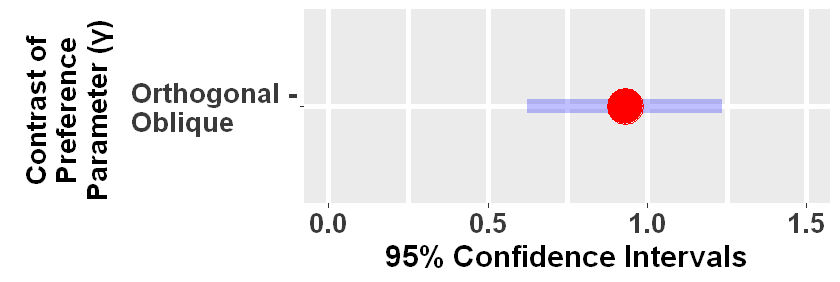

In [11]:
# draw the confidence intervals of contrasts:
options(repr.plot.height=2.35, repr.plot.width=7)
p = plot(pairs(emm.Orientation, comparisons = TRUE))

# set the confidence intervals:
p$data$lcl = c$lower.CL
p$data$ucl = c$upper.CL

# set point sizes:
tmp = summary(pairs(emm.Orientation))
point_size = pmax(pmin(log(1/tmp$p.value,2),10),1)

# set point colors:
point_color = rep("black", length(point_size))
point_color[(p$data$lcl>0 & p$data$ucl>0) | (p$data$lcl<0 & p$data$ucl<0)] = "red"

# set plot properties:
plot.Orientation = p + 
    geom_point(size = point_size, color = point_color) + 
    xlab("95% Confidence Intervals") + ylab("Contrast of \nPreference \nParameter (\u03b3) \n ") + 
#     scale_y_discrete(limits = rev) + 
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 17, face="bold", vjust = -2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 16, face="bold", color="#3a3a3a", hjust = 0),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=1.5),
          panel.grid.major = element_line(colour = "white",size=1.5)) + 
    scale_y_discrete(limits = rev,
                     labels = "Orthogonal - \nOblique") + 
    coord_cartesian(xlim = c(0,1.5)) + 
    scale_x_continuous(breaks = c(0, 0.5, 1, 1.5))


plot.Orientation

# save plot:
ggsave("plot_Gamma_B.jpg", dpi = 300, height = 2.35, width = 7)